## Rainfall Prediction Model

Rainfall Prediction is one of the difficult and uncertain tasks that have a significant impact on human society. Timely and accurate forecasting can help financial loss.Here i use some of the common machine learning techniques to create models that can predict whether it will rain tomorrow or not based on the weather data for that day in major cities in Australia.

____

### Steps Performed

- Imported all necessary libraries
- Data Exploration
- Balancing the data
- Treated Missing values
- Removed Outliers
- Feature selection using Filter and Wrapper method
- Feature Scaling
- Splitted the data into Training and Testing set
- Applied Machine learning algorithms

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Data Exploration

In [2]:
# importing dataset

df = pd.read_csv(r"C:\Users\hussa\Downloads\rainfall-prediction-main\rainfall-prediction-main\dataset\rainfall.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.shape

(142193, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [7]:
# to see all columns

pd.set_option('max_columns',50)

In [8]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Checking Unique values in Categorical columns

In [9]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [10]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [11]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [12]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [13]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# Raintoday and rainTomorrow are in objects, so we need to convert them into binary
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

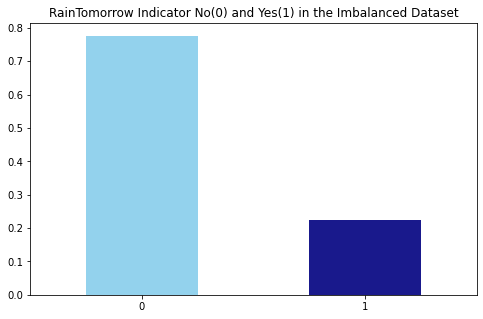

In [16]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9,rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

Here we can see that there is a huge difference in The presence of counts of 0's and 1's.So there is a class imbalance and we have to deal with it. 

# Handling class imbalance 

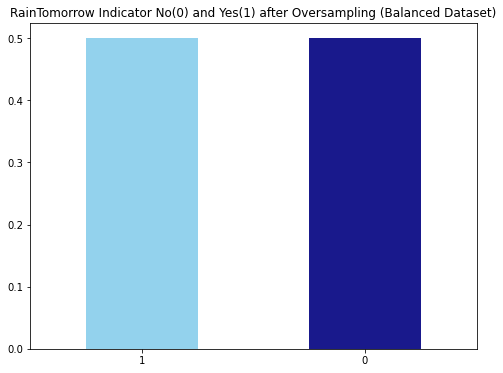

In [17]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=0)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,6))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

# Missing Data

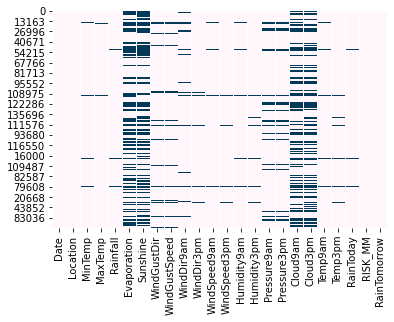

In [18]:
#we can check which feature has lot of missing data by plotting a heatmap

sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
plt.show()

“Evaporation”, “Sunshine”, “Cloud9am”, “Cloud3pm” are the features with a high missing percentage. So we will check the details of the missing data for these 4 features.

In [19]:
# checking percentage of missing values in below columns

total = oversampled.isnull().sum().sort_values(ascending=False)
percent = ((oversampled.isnull().sum()/oversampled.isnull().count())*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104956,47.570615
Evaporation,95384,43.232169
Cloud3pm,85512,38.757750
Cloud9am,81222,36.813336


4 features have less than 50 per cent missing data. So instead of rejecting them completely, we’ll consider them in our model with proper imputation.

# Imputation and Transformation

In [20]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [21]:
# Impute categorical variable with Mode

oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])


In [22]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [23]:
oversampled.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [24]:
#Multiple Imputation by Chained Equations

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

We will now detect and eliminate outliers from the inter-quartile interval-based data set.

In [25]:
# Detecting outliers with IQR

Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1534.250000
Location           25.000000
MinTemp             9.200000
MaxTemp            10.300000
Rainfall            2.400000
Evaporation         4.110837
Sunshine            5.913262
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.127353
Pressure9am         8.788873
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.675052
Temp9am             9.300000
Temp3pm             9.826766
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


### Removing Outliers

In [26]:
# Removing outliers from the dataset

MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(157053, 24)

### Heatmap

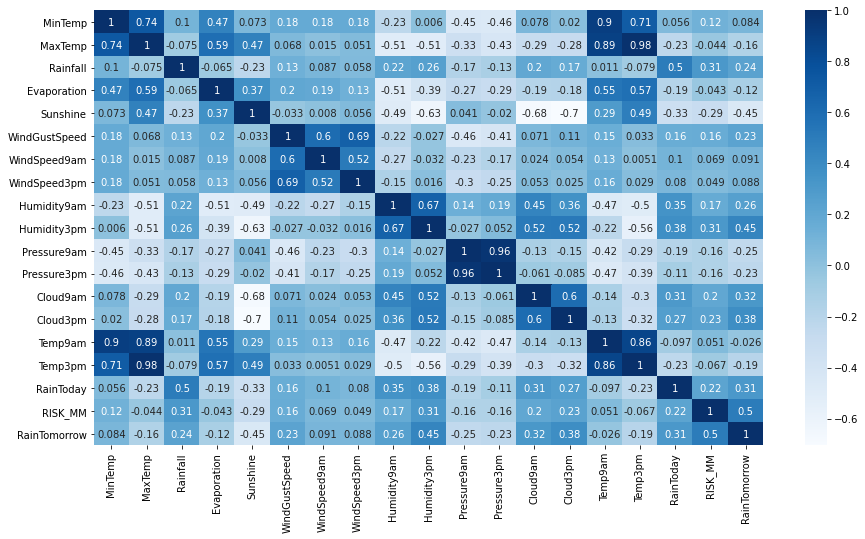

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

The following feature pairs have a strong correlation with each other:

MaxTemp and MinTemp
Pressure9h and pressure3h
Temp9am and Temp3pm
Evaporation and MaxTemp
MaxTemp and Temp3pm
But in no case is the correlation value equal to a perfect “1”. We are therefore not removing any functionality

# Feature Selection for Rainfall Prediction


I am using both the filter method and the wrapper method(random forest) for feature selection to train our rainfall prediction model.

# Filter Method (Chi-Square)


Using MinMaxScaler instead of StandardScaler in order to avoid negative values.

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel

In [29]:

# Standardizing data

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [30]:
# Feature Importance using Filter Method (Chi-Square)

X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')


Index(['Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday', 'RISK_MM'],
      dtype='object')
We can observe that “Sunshine”, “Humidity9am”, “Humidity3pm”, “Pressure9am”, “Pressure3pm” have higher importance compared to other features

# Wrapping Method (Random Forest)

In [31]:
X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(RandomForestClassifier(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Cloud3pm', 'RISK_MM']
[0.00215298 0.00227962 0.0028516  0.00377597 0.01033663 0.00267484
 0.06108646 0.00154023 0.00711242 0.00175296 0.00171082 0.00156223
 0.00200382 0.00726999 0.03263553 0.00831995 0.0142519  0.02028333
 0.05112533 0.00295545 0.00538457 0.00359086 0.7533425 ]


Selecting features by filtering method (chi-square value).

# Splitting Data into Training and Testing set

It is now time to split our data into training and cross-validation data. This is because, we need to test whether our model is performing well on the unseen class (cross-validation and test data)

In [32]:
from sklearn.model_selection import train_test_split

features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Normalize Features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

### Logistics Regression

In [33]:
# logistics regression


log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_lg = log_reg.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression is :',accuracy_score(y_test,y_pred_lg))

Accuracy of Logistic Regression is : 0.7847250963038426


### Classification Report

Classification report gives a very good understanding of the precision, recall and the f1-score along with accuracy that are important metrics that we generally consider when measuring the performance of a general classifier model.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83     19024
         1.0       0.75      0.67      0.71     12387

    accuracy                           0.78     31411
   macro avg       0.78      0.77      0.77     31411
weighted avg       0.78      0.78      0.78     31411



### Confusion Matrix

A confusion matrix would give us the values between the actual and the predicted outcomes

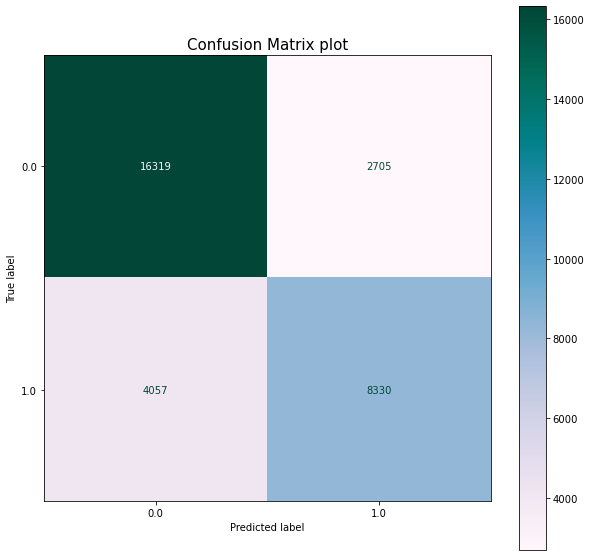

In [36]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(log_reg, X_test, y_test, ax = ax, cmap = 'PuBuGn')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

### Decision Tree Classifier

In [37]:

# Decision Tree

dtc = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=0)
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

In [38]:
print('Accuracy of Decision Tree Classifier is :',accuracy_score(y_test,y_pred_dtc))

Accuracy of Decision Tree Classifier is : 0.8240425328706504


In [39]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86     19024
         1.0       0.78      0.77      0.77     12387

    accuracy                           0.82     31411
   macro avg       0.82      0.81      0.82     31411
weighted avg       0.82      0.82      0.82     31411



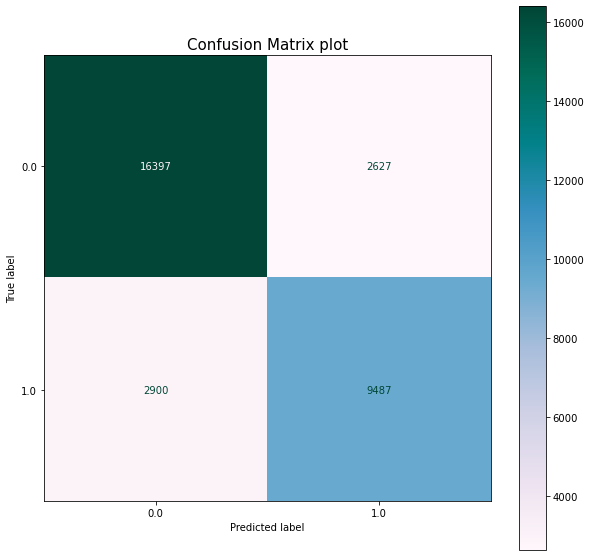

In [40]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(dtc, X_test, y_test, ax = ax, cmap = 'PuBuGn')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

### Random Forest Classifier

In [41]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=10,random_state=0)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)

In [42]:
print('Accuracy of Random Forest Classifier is :',accuracy_score(y_test,y_pred_rfc))

Accuracy of Random Forest Classifier is : 0.841138454681481


In [43]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     19024
         1.0       0.82      0.77      0.79     12387

    accuracy                           0.84     31411
   macro avg       0.84      0.83      0.83     31411
weighted avg       0.84      0.84      0.84     31411



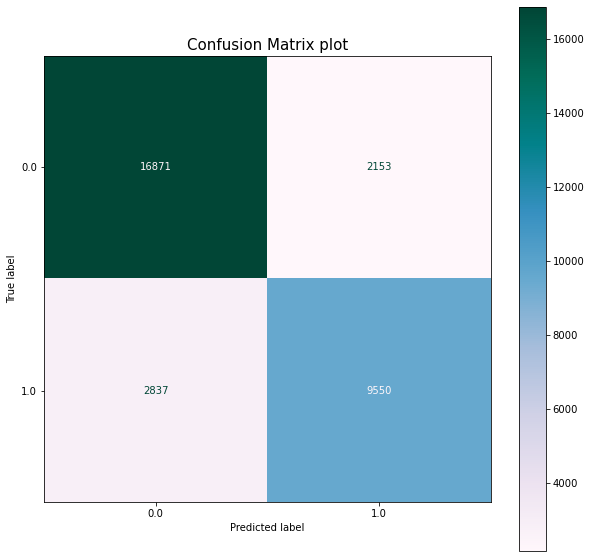

In [44]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(rfc, X_test, y_test, ax = ax, cmap = 'PuBuGn')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

### XGBoost Classifier

In [45]:
import xgboost as xgb
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [46]:

y_pred_xgb = xgboost.predict(X_test)
print('Accuracy of Random Forest Classifier is :',accuracy_score(y_test,y_pred_xgb))

Accuracy of Random Forest Classifier is : 0.8837668332749674


In [47]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     19024
         1.0       0.85      0.85      0.85     12387

    accuracy                           0.88     31411
   macro avg       0.88      0.88      0.88     31411
weighted avg       0.88      0.88      0.88     31411



In [48]:
from sklearn.metrics import precision_score,recall_score,f1_score

print('Precision is :', precision_score(y_test,y_pred_xgb))
print('Recall is :', recall_score(y_test,y_pred_xgb))
print('F1 Score is :', f1_score(y_test,y_pred_xgb))

Precision is : 0.854315379623621
Recall is : 0.8502462258819731
F1 Score is : 0.8522759457819139


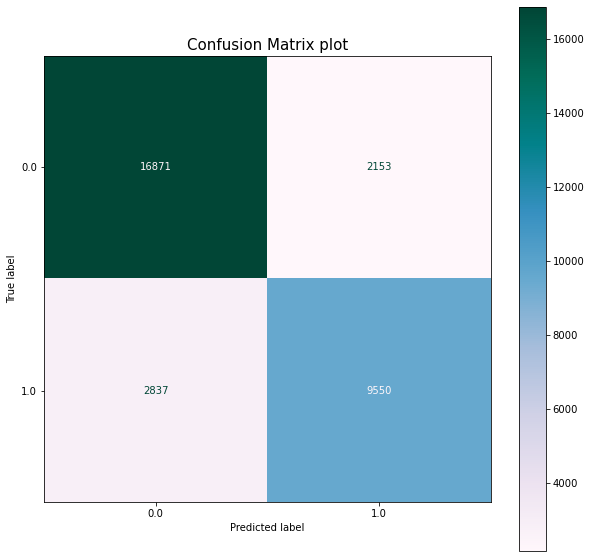

In [49]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(rfc, X_test, y_test, ax = ax, cmap = 'PuBuGn')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

### ROC AUC Curve

We can also understand the performance of the model by taking into account the AUC (Area under the curve) and checking if the values is close to 1. The higher is the value of AUC, the better the model is said to be performing and vice-versa.

AUC for our classifier is: 0.9526615070379206


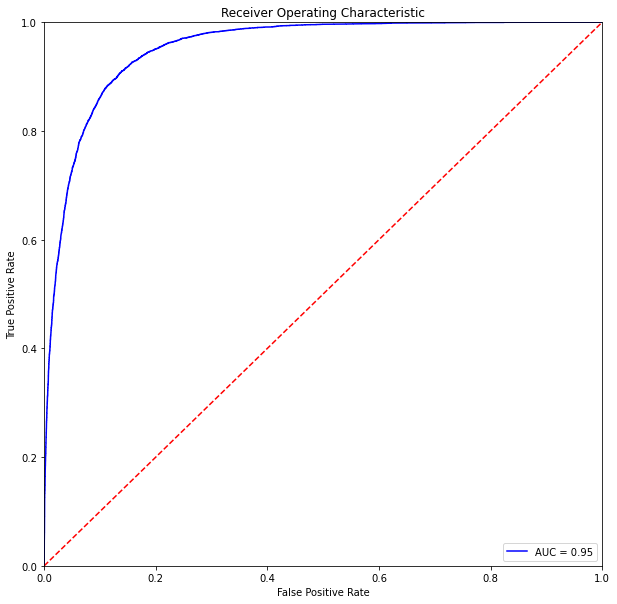

In [50]:
from sklearn.metrics import roc_curve, auc

class_probabilities = xgboost.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion

- Best Model     - XGBoost Classifier
- Accuracy       - 88%
- Precison score - 85%
- Recall score   - 85%
- F1 score       - 85%

It could be seen based on the results that oXGBoost model are performing very good as compared to other models with a accuracy of 88%.
Therefore, the model would be able to predict whether a Tomorrow will be rain or not with an accuracy of about 84% which is not bad for a model that contains imbalanced data.

____